In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast 

from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['ssjob_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\welcome\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_da = df[df['job_title'] == 'Data Analyst'].copy()
df_da

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
101,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-20 13:15:45,True,False,Singapore,None,NaN,NaN,Moovaz,[sql],{'programming': ['sql']}
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785617,Data Analyst,Data Analyst,"Lisbon, Portugal",via Empregos Trabajo.org,Full-time,False,Portugal,2023-06-28 06:51:12,True,False,Portugal,None,NaN,NaN,Onrising,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785638,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-27 06:47:13,False,False,Argentina,None,NaN,NaN,Emprego,"[python, r, sql, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."
785644,Data Analyst,Data Analyst,"Las Condes, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-08-20 06:29:50,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,"[sql, python, r, snowflake, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['sno..."


In [16]:
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month
df_da
df_da_explode = df_da.explode('job_skills')
df_da_explode
df_da_pivot = df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending = False).index]
df_da_pivot= df_da_pivot.drop('Total')
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,chainer,debian,pascal,mxnet,next.js,nuix,suse,svelte,twilio,wsl
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2916,1820,1641,1474,1114,851,912,305,325,290,...,0,1,0,0,0,0,0,0,0,0
2,1972,1233,1140,965,805,589,580,255,229,212,...,0,0,0,0,0,0,0,0,0,1
3,1952,1243,1115,1022,808,586,556,204,221,222,...,0,0,0,0,0,0,1,0,0,0
4,1934,1222,1129,960,753,579,512,195,215,235,...,0,0,0,0,0,0,0,0,0,0
5,1844,1135,1057,886,720,558,400,183,196,167,...,0,0,0,0,0,0,0,0,0,0
6,2000,1238,1185,994,869,629,504,208,211,225,...,0,0,0,0,0,0,0,0,0,0
7,1891,1207,1142,944,773,608,454,192,194,194,...,0,0,1,0,1,0,0,0,0,0
8,2306,1537,1398,1209,1032,747,570,234,225,211,...,0,0,0,0,0,0,0,0,0,0
9,1767,1138,1041,883,808,521,426,183,127,132,...,0,0,0,0,0,1,0,0,0,0


Text(0.5, 0, '')

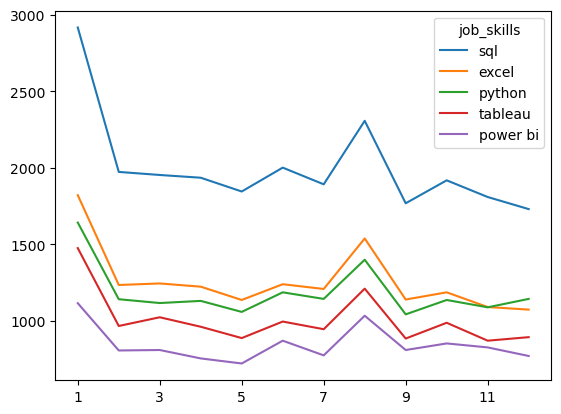

: 

In [ ]:
df_da_pivot.iloc[:, :5].plot(kind = 'line')
plt.xlabel('')

In [2]:
print('hii')

hii
